Тестовая работа по анализу данных (EDA)
Школа - SkillFactory Учащийся - Шальнов Олег Группа - DST-35

Цель проекта

Провести первичный анализ данных из DataSet для определения параметров будующей модели по отслеживанию влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска и составить отчет по его результатам.

Задачи проекта

1. Первичная обработка данных
2. Оценка распределения признака для числовых переменных, устранение выбросов
3. Оценка количество уникальных значений для номинативных переменных
4. Преобразование данных (по необходимости)
5. Проведение корреляционного анализа количественных переменных
6. Отбор не коррелирующих переменных
7. Анализ номинативные переменных и остранение тех, которые не влияют на предсказываемую величину (score)
Исходные данные находятся в файле stud_math.csv

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [7]:
stud_math = pd.read_csv("stud_math.csv")


In [8]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Приведем наименование колонок к единому формату

In [9]:
stud_math.columns = [k.lower() for k in stud_math.columns] # наименования полей меленькими буквами

In [10]:
stud_math.columns = [k.split(",")[0] for k in stud_math.columns] # наименование поля - одно слово


In [11]:
stud_math.head()


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [12]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Всего таблица состоит из 395 строк и 30 столбцов (признаков): 13 числовых и 17 строковых (номинативных). Среди номинативных признаков даты/времени нет.

Теперь необходимо проанализировать каждое поле 


*school* - аббревиатура школы, в которой учится ученик 

In [13]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


В выборке участвуют ученики двух школ.
Все значения не нулевые. 
Предполагаем, что значения данного поля влияют на результат. Не удаляем

*sex* - пол ученика ('F' - женский, 'M' — мужской )

In [14]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


Первичный анализ показывет, что исследовании принимают участие примерно одинаковое кол-во  девочек (208) и мальчиков (187). Пропусков нет.Значения, которые не соответствуют условиям задачи, отсутствуют. Однако данная пропорция может измениться после проведени анализа значений других полей в выборке (удаление наблюдений для исключения пропусков и выбросов в других полях).    

*age* - возраст ученика (от 15 до 22)

Числовой столбец. Пропущенных значений (NaN) нет. Проведем анализ 


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

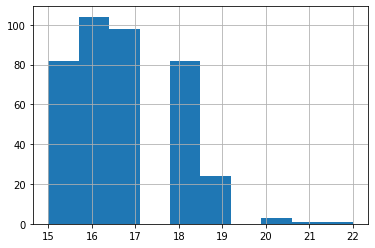

In [15]:
stud_math.age.hist()
stud_math.age.describe()

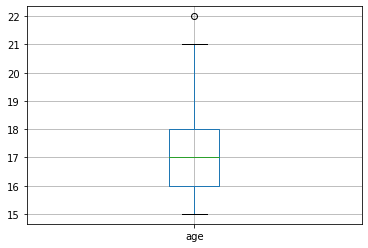

In [16]:
stud_math.boxplot(column=['age'])

In [17]:
dsc = stud_math.age.describe()

In [18]:
IQR = dsc['75%'] - dsc['25%']

In [19]:
# Покажем количество наблюдений, которые не характерны для общей статистической   
len(stud_math[stud_math.age>(dsc['75%'] + 1.5*IQR)])

1

In [20]:
len(stud_math[stud_math.age<(dsc['25%'] - 1.5*IQR)])

0

Значения 'age' смещены вправо, это значит, наблюдения содержат больше информаци по младшим ученикам, чем по старшим. Значения поля соответcтвуют условиям задачи (возраст ученика от 15 до 22 лет).  
Есть разрыв данных по возрасной группе 17-18 лет. 
Есть выбросы: одно нетипичное наблюдение - возраст студента больше 21 года - кандидат на удаление (?). 


*address* - тип адреса ученика ('U' - городской, 'R' - за городом) 

In [21]:
stud_math.address

0      U
1      U
2      U
3      U
4      U
      ..
390    U
391    U
392    R
393    R
394    U
Name: address, Length: 395, dtype: object

In [22]:
stud_math.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

Из 395 наблюдений:
295 учеников живет в городе, 
83 - за городом, 
у 17 учеников тип адреса не проставлен (кандидаты на удаление?). Значения, которые не соответствуют условиям задачи, отсутствуют

*famsize* - размер семьи('LE3' <= 3, 'GT3' >3)


In [23]:
stud_math.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

Из 395 наблюдений: 295 учеников живет в городе, 83 - за городом, у 17 учеников тип адреса не проставлен (пропуски, кандидаты на удаление?). Значения, которые не соответствуют условиям задачи, отсутствуют

*pstatus* - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [24]:
stud_math.pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: pstatus, dtype: int64

Из 395 наблюдений: родители 314 учеников живут вместе, 36 - раздельно, по 45 наблюденям данные отсутствую (пропуски, кандидаты на удаление?). Пропущенных значений больше, чем записей с признаком раздельного проживания родителей. Значения, которые не соответствуют условиям задачи, отсутствуют


*medu* — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [27]:
stud_math.medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: medu, dtype: int64

count    392.000000
mean       2.755102
std        1.099279
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

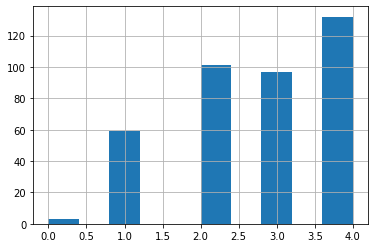

In [34]:
stud_math.medu.hist()
stud_math.medu.describe()

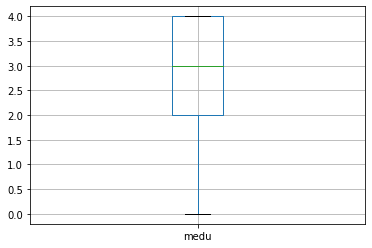

In [38]:
stud_math.boxplot(column=['medu'])

Значения, которые не соответствуют условиям задачи, отсутствуют. Пропущено всего 3 значения. Мамы более половины учеников имеют высшее, среднее или среднее специальное образование. Хотя не типичным является отсутствие образования у матери, предлагается не считать это выбросом на данном этапе. 

*fedu* — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [30]:
stud_math.fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: fedu, dtype: int64

Присутствует 1 значение, которое не соответствует условиям задачи. Предполагается опечатка. Заменим на 4.0. 

In [32]:
stud_math[stud_math.fedu == 40.0]=4.0

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

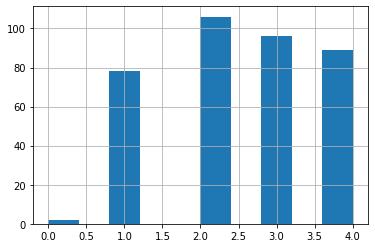

In [36]:
stud_math.fedu.hist()
stud_math.fedu.describe()

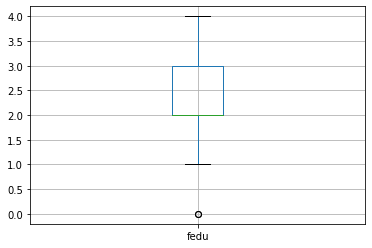

In [37]:
stud_math.boxplot(column=['fedu'])

Пропущено 24 значения. Папы учеников не такие образованные как мамы (средний уровень образованности 2.75 у мам против 2.51 у пап). Уровень образования отцов в выборке ближе к нормальному распределению, смещенному вправо. Хотя не типичным является отсутствие образования у отцов, предлагается не считать это выбросом на данном этапе. 

*mjob* — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

In [40]:
stud_math.mjob.value_counts(dropna=False)

other       133
services     97
at_home      58
teacher      55
health       32
NaN          19
4.0           1
Name: mjob, dtype: int64

Присутствует 1 значение, которое не соответствует условиям задачи. Предлагается заменить на other (предполагается, что при заполении ввели не категорию, а индекс категории).  

In [42]:
stud_math.loc[stud_math['mjob'] == 4.0] = 'other'

In [43]:
stud_math.mjob.value_counts(dropna=False)

other       134
services     97
at_home      58
teacher      55
health       32
NaN          19
Name: mjob, dtype: int64

Пропущено 19 значений. Мамы большинства ученииков работают в других сферах (133 + 1[измененная запись]) или на государственной службе (97). 

PS или вместо послесловия (для ментора)

Работа сделана по методике, которая задана в первой части работы "Проект 2. Разведовательный анализ данных"

Я не профессионал в области анализа данных, поэтому к Вам вопрос, пройдет ли изложенный ниже подход? 



1. Общие работы с БД справдедливы и здесь

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud_math = pd.read_csv("stud_math.csv")
stud_math.info()

In [ ]:
stud_math.columns = [k.lower() for k in stud_math.columns] # наименования полей меленькими буквами
stud_math.columns = [k.split(",")[0] for k in stud_math.columns] # наименование поля - одно слово

2. Рассмотрим поле score - мы же для прогнозирования его строем тестовую и проверочную выборки

Из 395 записей не NaN 389. Здесь развилка. Что значит Nan в результате выборки? Я бы удалил NaN (6 наблюдений).

In [ ]:
stud_math=stud_math.dropna(subset=['score'])

In [ ]:
stud_math

Теперь проанализируем поле score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

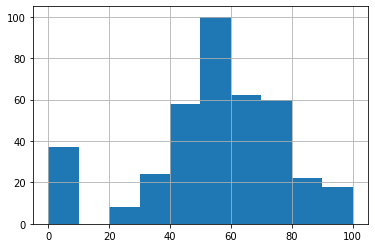

In [ ]:
stud_math.score.hist()
stud_math.score.describe()

In [ ]:
len(stud_math[stud_math.score==0.0])

37

In [ ]:
# Сделать процедуру, на вход подать значение полей, на выходе структуру 
dsc = stud_math.score.describe()
IQR = dsc['75%'] - dsc['25%']
print('Количество наблюдений, считающихся выбросом (слева):', 
      len(stud_math[stud_math.score<(dsc['25%'] - 1.5*IQR)]))
print('Количество наблюдений, считающихся выбросом (справа):',
      len(stud_math[stud_math.score>(dsc['75%'] + 1.5*IQR)]))
dsc

Количество наблюдений, считающихся выбросом (слева): 0
Количество наблюдений, считающихся выбросом (справа): 0


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Мы видем 37 записей с значениями score = 0. При этом данная ситуация выбросом не считается (укладывается в 1,5 межквартиных интервалов с обеих сторон). 
Посмотрим в целом на данные, по  которым нулевые значения score:  

In [ ]:
display(stud_math[stud_math.score == stud_math.score.min()])

Если внимательно посмотреть на получившийся набор данных, то практичски в каждой строке есть признаки со значением NaN. Оставим пока как есть набор данных - вернемся в конце при конечном анализе результатов

3. Удаление из набора данных значения тех полей, которые мы не сможем восстановить/подменить. Критерий  - здравый смысл. 

In [ ]:
stud_math.isna().sum()

school         0
sex            0
age            0
address       15
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
studytime      7
higher        20
internet      34
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences      11
score          0
dtype: int64

Поясню, как работает здравый смысл на примере.
Значения NaN в номинативных переменных нам не восстановить: address, famsize, pstatus, mjob, и тд. 
Далее, например, по образованию матери или отца есть численный диапазон, но в конце придем к тому, что среднене, максимальное или предыдущее значение не поставишь. Исходя из описанной логики, приходим, к тому, что сразу надо удалять все записи с NaN.

In [ ]:

df=pd.DataFrame() # При проверке гипотезы получим новый DF, 
                  # чтобы при необходимости вернуться к предыдущим
                  # результатам 
df=stud_math.copy()
df=df.dropna()

#for col in df:
#    df=df.dropna(subset=[col])  #

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   sex         97 non-null     object 
 2   age         97 non-null     int64  
 3   address     97 non-null     object 
 4   famsize     97 non-null     object 
 5   pstatus     97 non-null     object 
 6   medu        97 non-null     float64
 7   fedu        97 non-null     float64
 8   mjob        97 non-null     object 
 9   fjob        97 non-null     object 
 10  reason      97 non-null     object 
 11  guardian    97 non-null     object 
 12  traveltime  97 non-null     float64
 13  studytime   97 non-null     float64
 14  failures    97 non-null     float64
 15  schoolsup   97 non-null     object 
 16  famsup      97 non-null     object 
 17  paid        97 non-null     object 
 18  activities  97 non-null     object 
 19  nursery     97 non-null     ob

Получили выборку без NaN из 97 наблюдений. 
Вернемся к анализу знаячений score

In [ ]:
stud_math.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

count    97.000000
mean     52.061856
std      21.049948
min       0.000000
25%      40.000000
50%      55.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

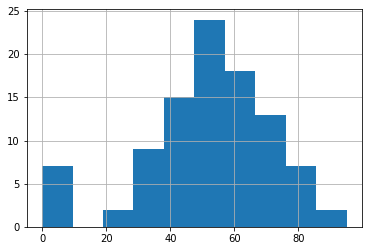

In [ ]:
df.score.hist()
df.score.describe()


In [ ]:
len(df[df.score == 0.0])

7

Что изменилось: 

граница 3-его квартиля (было 70, стало 65), 
максимум (было - 100, стало - 95), 
среднее (было - 52.26, стало 52.06)
отклонение (было -22.91, стало - 21.05)

Что не поменялось:
распределение - нормальное, форма смещения - левая (среднее меньше медианы)
минимум (0), граница 1-го квартиля (40), медиана (55)  

In [ ]:
dsc = df.score.describe()
IQR = dsc['75%'] - dsc['25%']
print('Количество наблюдений, считающихся выбросом (слева):', 
      len(df[df.score<(dsc['25%'] - 1.5*IQR)]))
print('Количество наблюдений, считающихся выбросом (справа):',
      len(df[df.score>(dsc['75%'] + 1.5*IQR)]))

Количество наблюдений, считающихся выбросом (слева): 7
Количество наблюдений, считающихся выбросом (справа): 0


В результате проведенных операций нулевые значения в score трактуются теперь как выброс. Форма распределения практически не изменилась. И есть увереннось в достоверности данных (ничего не придумано, никаких дополнительных подстановок). 

Открытый вопрос: хватит ли ~90 записей (после всех преобразований) для формирования обучающей и тестовой (контрольной) выборки.



Что дальше? Необходимо провести анализ значений каждого поля, как и в основной работе.  